# Máquinas de Soporte Vectorial
Este es un ejemplo del uso de máquinas de soporte vectorial (SVM, por sus siglas en inglés) utilizando un conjunto de datos previamente definido.

# Conjunto de datos
El conjunto de datos es la caracterización de tumores benignos y malignos asociados al cáncer de mama. Cuenta con 30 atributos obtenidos de imágenes de tumores y dos clases posibles de tumores.

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

atributos = pd.DataFrame(cancer.data[:,0:10])
atributos.columns = cancer.feature_names[0:10]

etiquetas = cancer.target

atributos.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


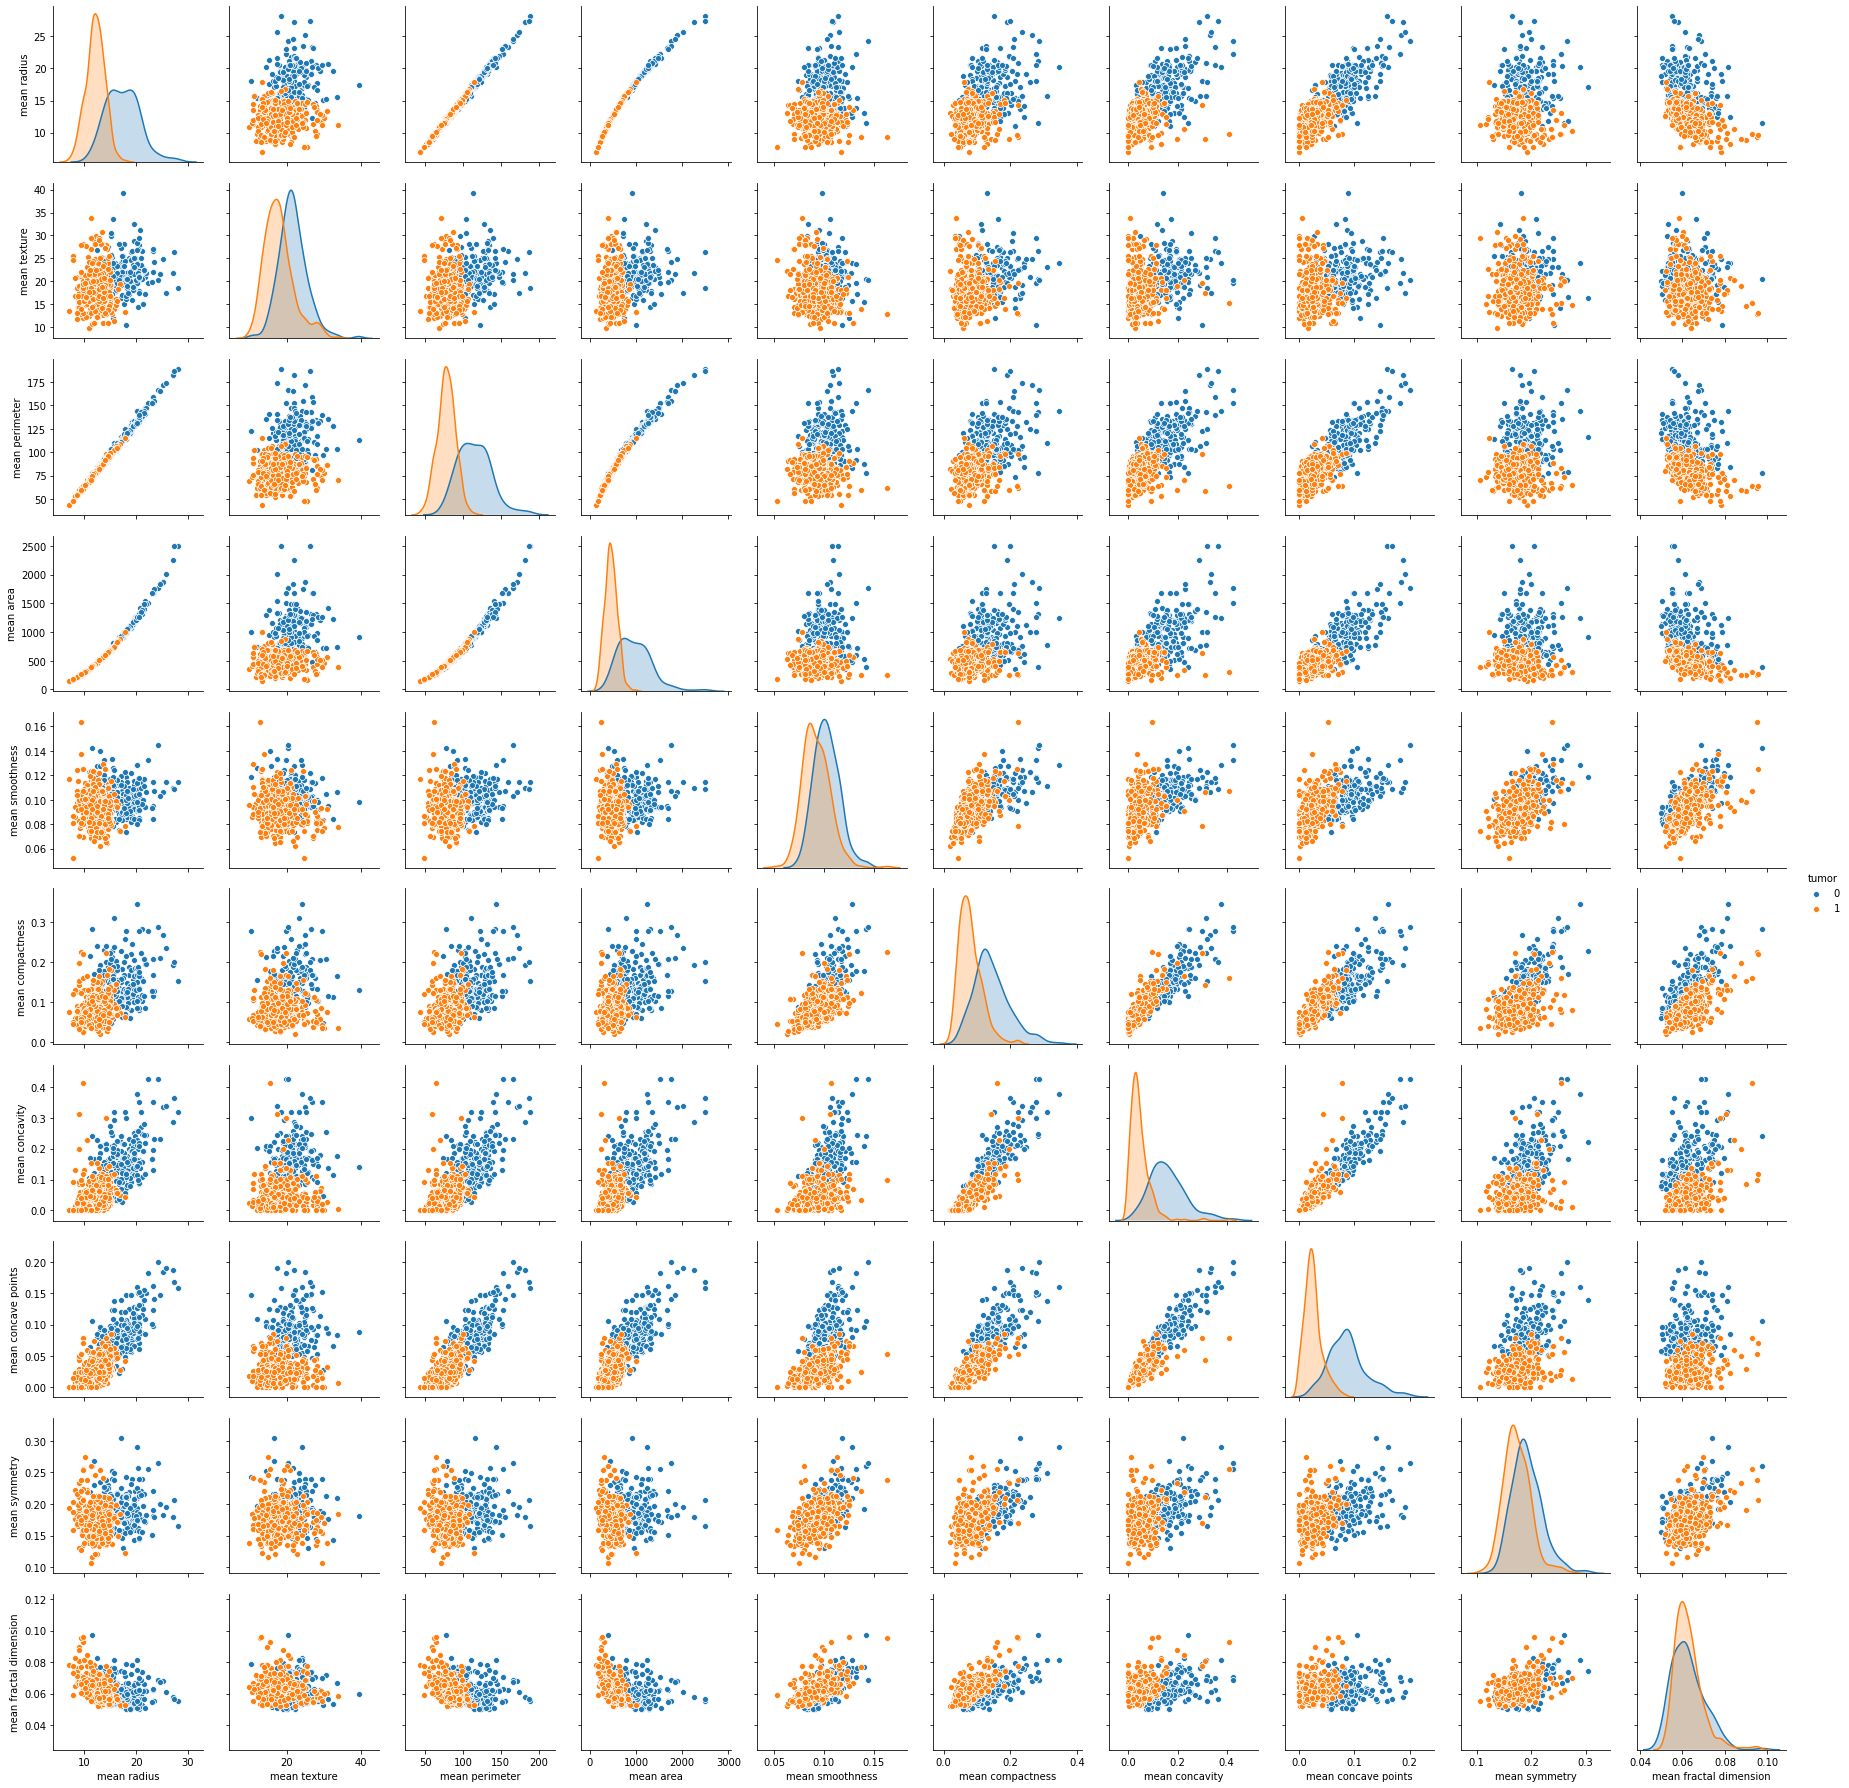

In [7]:
import seaborn as sns

datos = pd.concat([atributos,pd.DataFrame({"tumor": etiquetas})],axis=1)
sns.pairplot(datos,hue="tumor",vars=atributos.columns)

# Partición de datos
Se propone particionar los datos en 70% entrenamiento y 30% pruebas.

In [10]:
from sklearn.model_selection import train_test_split

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(atributos, etiquetas, 
                                                                        test_size=0.3, random_state=0)

# Estandarización de datos
Se recomienda estandarizar el subconjunto de datos de entrenamiento y a partir de los parámetros (media y desviación estándar), utilizarlos para estandarizar el subconjunto de datos de prueba.

In [11]:
from sklearn.preprocessing import StandardScaler

estandarizacion = StandardScaler()
estandarizacion.fit(X_entrenamiento)

Z_entrenamiento = pd.DataFrame(estandarizacion.transform(X_entrenamiento))
Z_prueba = pd.DataFrame(estandarizacion.transform(X_prueba))

# Entrenamiento del modelo usando SVM

In [25]:
# Definir el modelo SVM (modelo) y entrenarlo
from sklearn import svm
modelo = svm.SVC(kernel = 'rbf')
modelo.fit(Z_entrenamiento,y_entrenamiento)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Predicción de clases con el modelo

In [26]:
# Obtener las predicciones (y_prediccion) del subconjunto de datos de pruebas
y_prediccion = modelo.predict(Z_prueba)

# Evaluación del modelo

In [30]:
#!pip install -U scikit-learn --> Actualiza la version del scikit-learn 
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_prueba,y_prediccion))

#mc = plot_confusion_matrix(modelo, Z_prueba, y_prueba, cmap=plt.cm.Blues, values_format = '0.0f')

#print(mc.confusion_matrix)
#plt.show()

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        63
           1       0.93      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

